# 롤러코스터 데이터 분석하기

1.   가장 빠른 롤러코스터 TOP10 을 찾아보자!
2.   롤러코스터를 탈 때 짜릿함의 요인을 찾아보자!





In [ ]:
#한글 설치
#실행 / 런타임=런타임 다시 시작 / 런타임-런타임 다시 시작 및 모두 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

### 데이터 수집
https://kaggle.com/datasets/nolanbconaway/rollercoaster-tycoon-rides?select=rollercoasters.csvrollercoaster-tycoon-rides

In [ ]:
# 데이터분석 및 시각화 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#데이터 파일 업로드하기
#rollercoasters.csv

In [ ]:
# 판다스 자료형 데이터프레임 형식으로 저장 및 확인
df=pd.read_csv('rollercoasters.csv')
df

,park_id,theme,rollercoaster_type,custom_design,excitement,excitement_rating,intensity,intensity_rating,nausea,nausea_rating,...,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
0,0,Barony Bridge,Bobsleigh Coaster,0,5.49,High,5.71,High,4.86,Medium,...,12,63,1496,2.59,-0.27,1.71,0.00,2,19,0
1,0,Barony Bridge,Dinghy Slide,0,4.83,Medium,5.86,High,3.50,Medium,...,11,48,1079,2.83,-0.48,2.68,0.36,4,42,0
2,0,Barony Bridge,Wild Mouse,0,7.64,High,7.86,Very High,4.87,Medium,...,11,70,1591,3.13,-1.70,2.15,1.44,11,22,0
3,0,Barony Bridge,Wooden Roller Coaster,0,7.69,High,7.92,Very High,4.75,Medium,...,15,79,2401,3.31,-1.15,1.71,5.73,9,62,-1
4,1,Forest Frontiers,Junior Roller Coaster,0,5.17,High,5.54,High,3.81,Medium,...,13,51,1279,2.38,-0.26,2.45,0.72,4,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,30,Botany Breakers,Spiral Coaster,1,5.39,High,5.94,High,3.79,Medium,...,13,46,1174,2.69,-0.55,2.96,0.72,3,49,0
138,30,Botany Breakers,Twister Coaster,1,7.66,High,6.11,High,3.81,Medium,...,18,61,2221,3.86,-1.08,2.29,2.10,6,22,2
139,30,Botany Breakers,Mine Train Coaster,1,7.59,High,7.60,High,5.80,Medium,...,16,90,2972,3.33,-1.36,2.17,2.43,4,82,0
140,30,Botany Breakers,Wooden Roller Coaster,1,7.50,High,7.75,Very High,4.35,Medium,...,18,58,2001,3.01,-0.97,1.97,1.62,5,29,1


In [ ]:
# 데이터프레임의 상단 5개(상위 5개 행) 데이터 확인
df.head()

,park_id,theme,rollercoaster_type,custom_design,excitement,excitement_rating,intensity,intensity_rating,nausea,nausea_rating,...,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
0,0,Barony Bridge,Bobsleigh Coaster,0,5.49,High,5.71,High,4.86,Medium,...,12,63,1496,2.59,-0.27,1.71,0.00,2,19,0
1,0,Barony Bridge,Dinghy Slide,0,4.83,Medium,5.86,High,3.50,Medium,...,11,48,1079,2.83,-0.48,2.68,0.36,4,42,0
2,0,Barony Bridge,Wild Mouse,0,7.64,High,7.86,Very High,4.87,Medium,...,11,70,1591,3.13,-1.70,2.15,1.44,11,22,0
3,0,Barony Bridge,Wooden Roller Coaster,0,7.69,High,7.92,Very High,4.75,Medium,...,15,79,2401,3.31,-1.15,1.71,5.73,9,62,-1
4,1,Forest Frontiers,Junior Roller Coaster,0,5.17,High,5.54,High,3.81,Medium,...,13,51,1279,2.38,-0.26,2.45,0.72,4,39,0


In [ ]:
# 데이터프레임의 하단 5개(하위 5개 행) 데이터 확인
df.tail(
)

,park_id,theme,rollercoaster_type,custom_design,excitement,excitement_rating,intensity,intensity_rating,nausea,nausea_rating,...,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
137,30,Botany Breakers,Spiral Coaster,1,5.39,High,5.94,High,3.79,Medium,...,13,46,1174,2.69,-0.55,2.96,0.72,3,49,0
138,30,Botany Breakers,Twister Coaster,1,7.66,High,6.11,High,3.81,Medium,...,18,61,2221,3.86,-1.08,2.29,2.10,6,22,2
139,30,Botany Breakers,Mine Train Coaster,1,7.59,High,7.60,High,5.80,Medium,...,16,90,2972,3.33,-1.36,2.17,2.43,4,82,0
140,30,Botany Breakers,Wooden Roller Coaster,1,7.50,High,7.75,Very High,4.35,Medium,...,18,58,2001,3.01,-0.97,1.97,1.62,5,29,1
141,30,Botany Breakers,Hypercoaster,1,6.17,High,44.94,Medium,2.76,Medium,...,15,61,1791,2.69,-0.45,2.71,0.18,2,62,0


In [ ]:
# 데이터프레임의 크기(행, 열) 확인
df.shape

(142, 21)

In [ ]:
# 데이터프레임의 컬럼 정보 확인
df.columns

Index(['park_id', 'theme', 'rollercoaster_type', 'custom_design', 'excitement',
       'excitement_rating', 'intensity', 'intensity_rating', 'nausea',
       'nausea_rating', 'max_speed', 'avg_speed', 'ride_time', 'ride_length',
       'max_pos_gs', 'max_neg_gs', 'max_lateral_gs', 'total_air_time', 'drops',
       'highest_drop_height', 'inversions'],
      dtype='object')

In [ ]:
#info() 메소드를 통해 데이터 개수, 속성 개수, 속성명, 결측치, 속성의 데이터 유형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   park_id              142 non-null    int64  
 1   theme                142 non-null    object 
 2   rollercoaster_type   142 non-null    object 
 3   custom_design        142 non-null    int64  
 4   excitement           142 non-null    float64
 5   excitement_rating    142 non-null    object 
 6   intensity            142 non-null    float64
 7   intensity_rating     142 non-null    object 
 8   nausea               142 non-null    float64
 9   nausea_rating        142 non-null    object 
 10  max_speed            142 non-null    int64  
 11  avg_speed            142 non-null    int64  
 12  ride_time            142 non-null    int64  
 13  ride_length          142 non-null    int64  
 14  max_pos_gs           142 non-null    float64
 15  max_neg_gs           142 non-null    flo

### 데이터 속성 정보 확인

###### park_id 테마파크 식별자
###### theme 테마파크 이름
###### rollercoaster_type 롤러코스터 유형
###### custom_design 게임 유저가 직접 롤러코스터를 설계했는지 여부(참/거짓)
###### excitement 흥미도
###### excitement_rating 흥미도 등급
###### intensity 탑승 강도
###### intensity_rating 탑승 강도 등급
###### nausea 매스꺼움
###### nausea_rating 매스꺼움 등급
###### max_speed 최고 속도(mph)
###### avg_speed 평균 속도(mph)
###### ride_time 탑승 시간
###### ride_length 롤러코스터 길이
###### max_pos_gs, max_neg_gs,max_lateral_gs 탑승자가 받는 중력 가속도
###### total_air_time 탑승자의 무중력 경험 시간
###### drops 낙하 횟수
###### highest_drop_height 최고 낙하 높이
###### inversions 360° 회전하는 횟수















In [ ]:
# 데이터의 통계량(개수, 평균, 표준편차, 최솟값, 최댓값, 4분위수)
# 수치값을 갖는 속성에 대한 통계량 출력, 결측치 제외
df.describe()

,park_id,custom_design,excitement,intensity,nausea,max_speed,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
count,142.000000,142.000000,142.000000,142.000000,142.00000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,16.985915,0.697183,6.337183,6.798028,4.35493,43.570423,14.063380,71.957746,1987.528169,3.235141,-1.332183,1.950134,1.837324,5.619718,52.591549,0.091549
std,8.727543,0.461103,1.228618,3.516611,1.40691,8.980197,4.817543,21.639822,826.862726,0.715725,4.656121,0.573813,1.678598,3.979972,29.304020,1.057931
min,0.000000,0.000000,2.460000,1.930000,1.33000,29.000000,1.000000,12.000000,620.000000,2.140000,-56.000000,0.000000,0.000000,1.000000,9.000000,-1.000000
25%,10.000000,0.000000,5.720000,5.552500,3.39500,38.000000,12.000000,58.250000,1500.750000,2.722500,-1.310000,1.550000,0.877500,4.000000,39.000000,-1.000000
50%,19.000000,1.000000,6.405000,6.585000,4.25500,42.500000,14.000000,70.500000,1837.000000,3.080000,-1.005000,1.895000,1.440000,5.000000,49.000000,0.000000
75%,24.000000,1.000000,7.035000,7.627500,5.11000,47.000000,16.000000,83.000000,2354.000000,3.655000,-0.580000,2.410000,2.212500,6.000000,62.000000,0.000000
max,30.000000,1.000000,9.480000,44.940000,9.85000,89.000000,44.000000,186.000000,7497.000000,6.260000,1.090000,3.320000,11.520000,44.000000,239.000000,4.000000


In [ ]:
# 결측치 확인
df.isna().sum()

park_id                0
theme                  0
rollercoaster_type     0
custom_design          0
excitement             0
excitement_rating      0
intensity              0
intensity_rating       0
nausea                 0
nausea_rating          0
max_speed              0
avg_speed              0
ride_time              0
ride_length            0
max_pos_gs             0
max_neg_gs             0
max_lateral_gs         0
total_air_time         0
drops                  0
highest_drop_height    0
inversions             0
dtype: int64

In [ ]:
# 가장 빠른 롤러코스터 찾기
df_sorted_by_values = df.sort_values(by='max_speed' ,ascending=False)
pd.set_option('display.max_columns', None)

df_sorted_by_values.head(1)

,park_id,theme,rollercoaster_type,custom_design,excitement,excitement_rating,intensity,intensity_rating,nausea,nausea_rating,max_speed,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
85,21,Vertigo Views,Hypercoaster,0,9.48,Very High,9.14,Very High,5.02,Medium,89,21,186,7497,5.33,-2.08,2.69,11.52,15,239,0


In [ ]:
# 모든 열을 출력할 때: pd.set_option('display.max_columns', None)
# 모든 행을 출력할 때: pd.set_option('display.max_rows', None)
# 10개 열만 출력할 때: pd.set_option('display.max_columns', 10)
# 10개 행만 출력할 때: pd.set_option('display.max_rows', 10)
df_sorted_by_values.head(10)

,park_id,theme,rollercoaster_type,custom_design,excitement,excitement_rating,intensity,intensity_rating,nausea,nausea_rating,...,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
85,21,Vertigo Views,Hypercoaster,0,9.48,Very High,9.14,Very High,5.02,Medium,...,21,186,7497,5.33,-2.08,2.69,11.52,15,239,0
66,19,Razor Rocks,Air Powered Vertical Coaster,0,8.42,Very High,8.96,Very High,6.96,High,...,44,13,1168,4.00,-2.14,2.23,4.02,1,196,0
90,21,Vertigo Views,Reverse Freefall Coaster,0,5.19,High,7.47,High,5.37,High,...,39,12,918,3.44,0.00,0.00,2.88,1,121,0
131,29,Adrenaline Heights,Hypercoaster,1,6.89,High,8.60,Very High,5.22,High,...,15,93,2661,3.56,-2.11,2.97,2.43,3,101,0
133,29,Adrenaline Heights,Floorless Roller Coaster,1,7.19,High,9.59,Very High,5.66,High,...,15,65,1870,6.26,-2.01,2.93,1.41,4,101,1
129,29,Adrenaline Heights,Lay-down Roller Coaster,1,7.57,High,7.82,Very High,5.93,High,...,16,76,2385,3.96,-1.41,2.42,1.20,4,101,2
36,10,Karts And Coasters,Wooden Roller Coaster,0,8.88,Very High,8.93,Very High,5.17,High,...,23,92,4091,3.64,-1.54,2.14,5.25,9,82,-1
71,19,Razor Rocks,Hypercoaster,1,6.77,High,5.49,High,3.20,Medium,...,15,88,2608,2.90,-1.55,1.55,2.07,5,91,0
52,14,Canry Mines,Vertical Drop Coaster,0,7.48,High,5.62,High,2.78,Medium,...,11,58,1243,3.82,-1.20,1.35,2.58,2,98,-1
51,14,Canry Mines,Vertical Drop Coaster,0,7.14,High,5.42,High,2.65,Medium,...,11,70,1575,3.82,-1.14,0.91,2.01,2,98,-1


In [ ]:
# 테마파크 이름(theme), 롤러코스터유형(rollercoaster_type), 흥미도(excitement), 최고 속도(max_speed) 속성만 추출하기
df.iloc[0:10, [1, 2, 4, 10]]

,theme,rollercoaster_type,excitement,max_speed
0,Barony Bridge,Bobsleigh Coaster,5.49,39
1,Barony Bridge,Dinghy Slide,4.83,37
2,Barony Bridge,Wild Mouse,7.64,31
3,Barony Bridge,Wooden Roller Coaster,7.69,47
4,Forest Frontiers,Junior Roller Coaster,5.17,34
5,Haunted Harbour,Side-Friction Roller Coaster,5.68,32
6,Haunted Harbour,Wooden Roller Coaster,7.76,45
7,Haunted Harbour,Wooden Wild Mouse,7.19,30
8,Mystic Mountain,Stand Up Roller Coaster,5.36,41
9,Mystic Mountain,Wooden Roller Coaster,6.33,41


In [ ]:
# 롤러코스터 유형 값을 한번씩만 출력하기
x1 = df['rollercoaster_type'].unique()
x1

array(['Bobsleigh Coaster ', 'Dinghy Slide', 'Wild Mouse',
       'Wooden Roller Coaster ', 'Junior Roller Coaster',
       'Side-Friction Roller Coaster', 'Wooden Wild Mouse',
       'Stand Up Roller Coaster', 'Compact Inverted Coaster',
       'Looping Roller Coaster', 'Vertical Drop Coaster',
       'Inverted Roller Coaster', 'Spinning Wild Mouse',
       'Suspended Swinging Coaster', 'Mini Roller Coaster',
       'Virginia Reel', 'Heartline Twister Coaster',
       'Lay-down Roller Coaster', 'Spiral Coaster', 'Mine Train Coaster',
       'Corkscrew Roller Coaster', 'Stand Up Twister Roller Coaster',
       'Hypercoaster', 'Twister Coaster', 'Air Powered Vertical Coaster',
       'Floorless Roller Coaster', 'Giga Coaster', 'Water Coaster',
       'Reverse Freefall Coaster', 'Inverted Hairpin Coaster',
       'Hyper-Twister Roller Coaster'], dtype=object)

In [ ]:
# 롤러코스터 유형별 고유한 값 추출하기
x2 = df['rollercoaster_type'].nunique()
x2

31

In [ ]:
# 롤러코스터 유형별 개수 출력하기
rollercoaster_type_count = df['rollercoaster_type'].value_counts()
rollercoaster_type_count

Wooden Roller Coaster              22
Looping Roller Coaster             15
Vertical Drop Coaster               8
Corkscrew Roller Coaster            8
Hypercoaster                        7
Dinghy Slide                        7
Mine Train Coaster                  7
Compact Inverted Coaster            6
Mini Roller Coaster                 6
Stand Up Roller Coaster             5
Inverted Roller Coaster             5
Junior Roller Coaster               5
Spiral Coaster                      5
Twister Coaster                     4
Suspended Swinging Coaster          4
Lay-down Roller Coaster             4
Wooden Wild Mouse                   3
Bobsleigh Coaster                   3
Floorless Roller Coaster            2
Giga Coaster                        2
Virginia Reel                       2
Side-Friction Roller Coaster        2
Hyper-Twister Roller Coaster        2
Stand Up Twister Roller Coaster     1
Heartline Twister Coaster           1
Spinning Wild Mouse                 1
Air Powered 

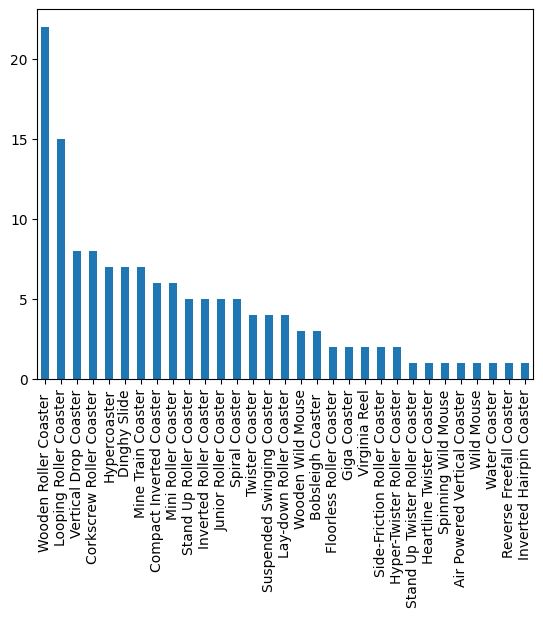

In [ ]:
# 롤러코스터 유형별 개수를 세로 막대그래프로 표현
rollercoaster_type_count.plot.bar()
plt.show()

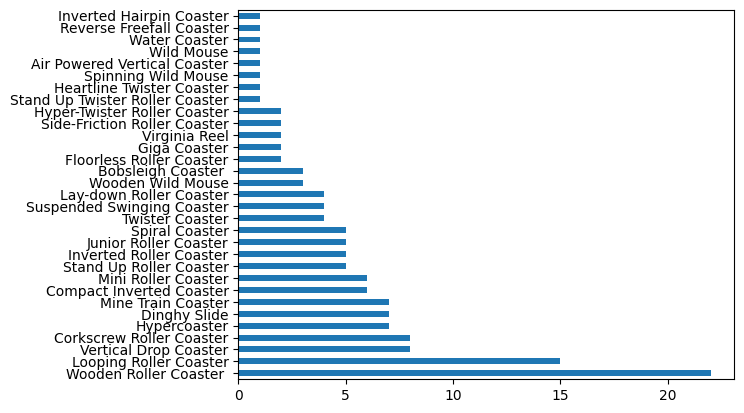

In [ ]:
# 롤러코스터 유형별 개수를 가로 막대그래프로 표현
rollercoaster_type_count.plot.barh()
plt.show()

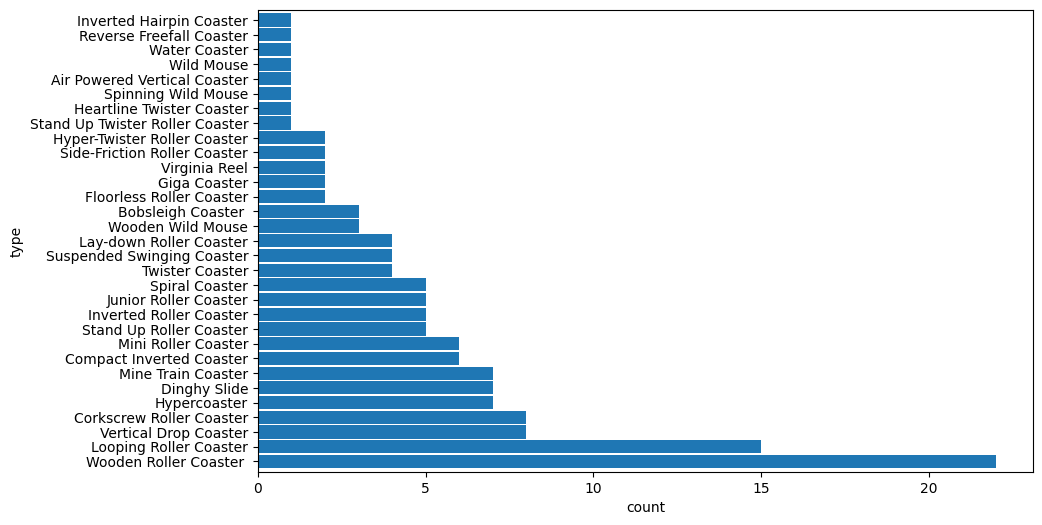

In [ ]:
# 그래프 크기 조정, 막대 너비 조정, x축 y축 이름 출력
plt.figure(figsize = (10, 6))
rollercoaster_type_count.plot.barh(width=0.9)
plt.xlabel('count')
plt.ylabel('type')
plt.show()

In [ ]:
# 막대 그래프에 막대에 문자열 출력
plt.figure(figsize = (10, 6))
#
#
#
#
#
plt.show()

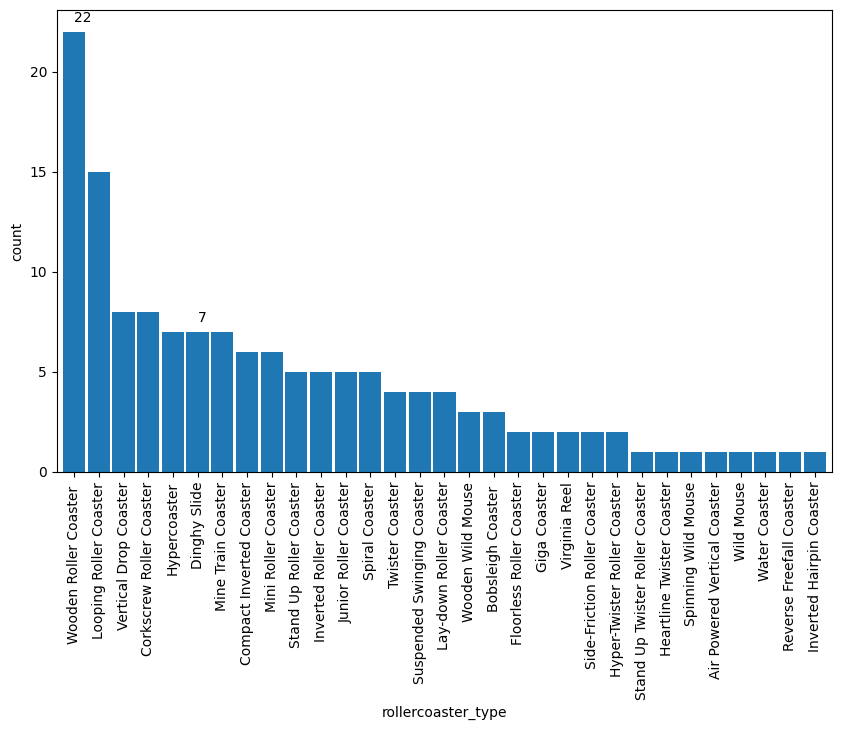

In [ ]:
# 모든 막대에 문자열 출력
plt.figure(figsize = (10, 6))
rollercoaster_type_count.plot.bar(width = 0.9)
plt.xlabel('rollercoaster_type')
plt.ylabel('count')
plt.text(0, 22.5, 22)
plt.text(5, 7.5, 7)
plt.show()

In [ ]:
rollercoaster_type_count.index

Index(['Wooden Roller Coaster ', 'Looping Roller Coaster',
       'Vertical Drop Coaster', 'Corkscrew Roller Coaster', 'Hypercoaster',
       'Dinghy Slide', 'Mine Train Coaster', 'Compact Inverted Coaster',
       'Mini Roller Coaster', 'Stand Up Roller Coaster',
       'Inverted Roller Coaster', 'Junior Roller Coaster', 'Spiral Coaster',
       'Twister Coaster', 'Suspended Swinging Coaster',
       'Lay-down Roller Coaster', 'Wooden Wild Mouse', 'Bobsleigh Coaster ',
       'Floorless Roller Coaster', 'Giga Coaster', 'Virginia Reel',
       'Side-Friction Roller Coaster', 'Hyper-Twister Roller Coaster',
       'Stand Up Twister Roller Coaster', 'Heartline Twister Coaster',
       'Spinning Wild Mouse', 'Air Powered Vertical Coaster', 'Wild Mouse',
       'Water Coaster', 'Reverse Freefall Coaster',
       'Inverted Hairpin Coaster'],
      dtype='object')

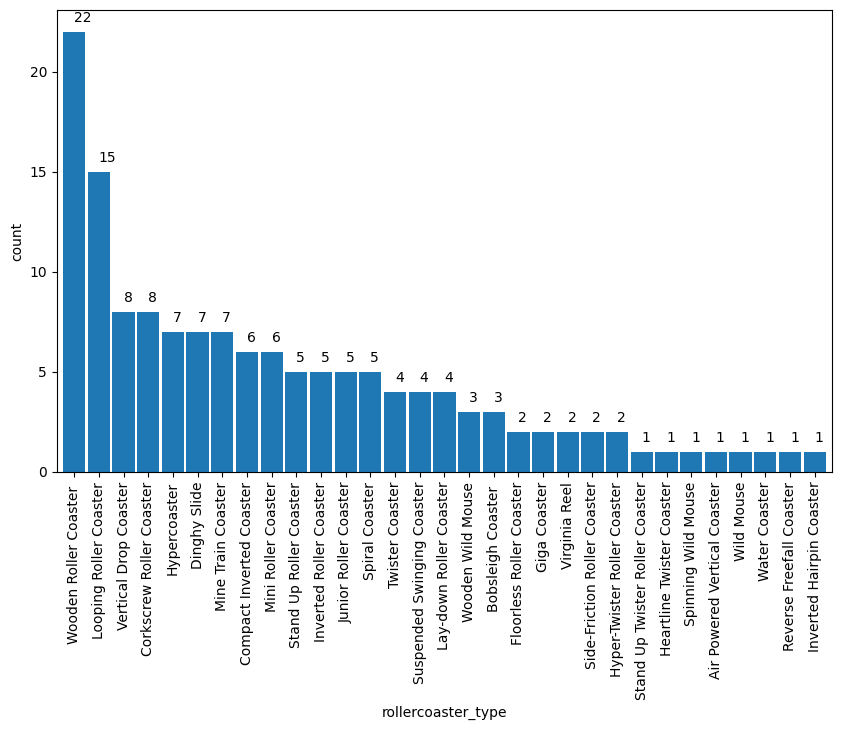

In [ ]:
# 모든 막대에 문자열 출력
plt.figure(figsize = (10, 6))
rollercoaster_type_count.plot.bar(width = 0.9)
plt.xlabel('rollercoaster_type')
plt.ylabel('count')

for i in range(0, len(rollercoaster_type_count)) :
  plt.text(i, rollercoaster_type_count[i] + 0.5, rollercoaster_type_count[i])
plt.show()

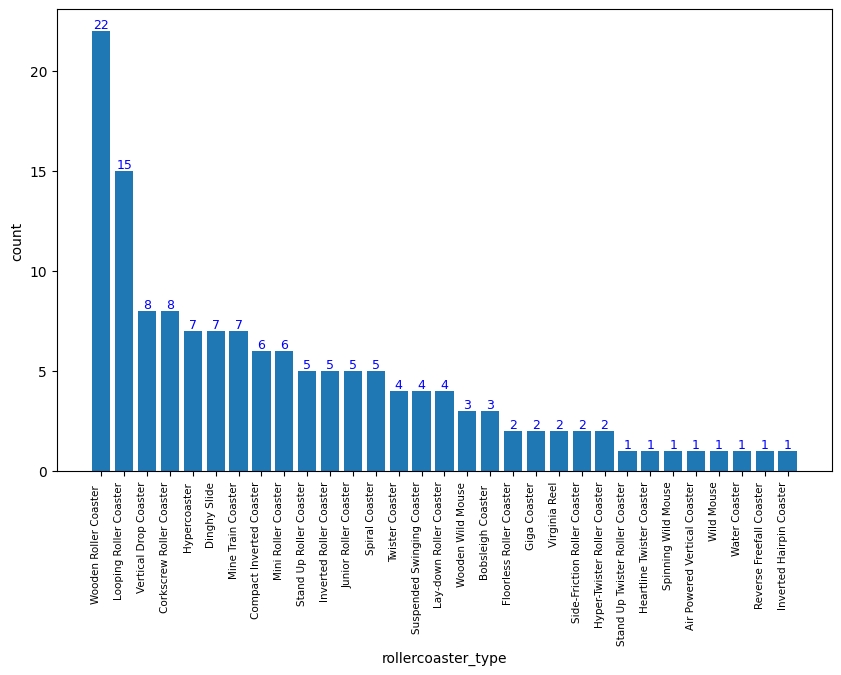

In [ ]:
# 모든 막대에 문자열 출력
plt.figure(figsize = (10, 6))
#rollercoaster_type_count.plot.bar(width = 0.9)
plt.xlabel('rollercoaster_type')
plt.ylabel('count')

index = rollercoaster_type_count.index
plt.bar(index, rollercoaster_type_count)
plt.xticks(rotation=90,fontsize=7.5,ha="right")

for i, x in enumerate(index) :
  c = 'blue'
  plt.text(x, rollercoaster_type_count[i], rollercoaster_type_count[i],
           fontsize=9,
           color=c,
           horizontalalignment='center',
           verticalalignment='bottom'
           )

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   park_id              142 non-null    int64  
 1   theme                142 non-null    object 
 2   rollercoaster_type   142 non-null    object 
 3   custom_design        142 non-null    int64  
 4   excitement           142 non-null    float64
 5   excitement_rating    142 non-null    object 
 6   intensity            142 non-null    float64
 7   intensity_rating     142 non-null    object 
 8   nausea               142 non-null    float64
 9   nausea_rating        142 non-null    object 
 10  max_speed            142 non-null    int64  
 11  avg_speed            142 non-null    int64  
 12  ride_time            142 non-null    int64  
 13  ride_length          142 non-null    int64  
 14  max_pos_gs           142 non-null    float64
 15  max_neg_gs           142 non-null    flo

In [66]:
# 상관관계 수치화 corr()
corr = df.corr(numeric_only=True)
corr

,park_id,custom_design,excitement,intensity,nausea,max_speed,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
park_id,1.000000,0.275621,0.208506,0.170565,0.122935,0.286958,0.199232,0.112578,0.196867,0.235944,-0.086916,-0.019231,0.001091,0.038230,0.263336,0.550886
custom_design,0.275621,1.000000,-0.301970,-0.054868,-0.239727,-0.160095,-0.259485,0.044198,-0.145209,0.053533,-0.049630,0.117613,-0.395978,-0.171402,-0.150410,0.057233
excitement,0.208506,-0.301970,1.000000,0.218619,0.349712,0.500800,0.393300,0.310817,0.555398,0.296372,0.004703,0.147490,0.513925,0.207620,0.474213,0.143430
intensity,0.170565,-0.054868,0.218619,1.000000,0.195823,0.191066,0.149153,-0.006945,0.094163,0.150158,0.009947,0.236579,0.060871,-0.004128,0.192446,0.072356
nausea,0.122935,-0.239727,0.349712,0.195823,1.000000,0.193787,0.207210,0.122904,0.204650,0.199447,-0.018263,0.268021,0.164505,0.020387,0.145657,0.289689
max_speed,0.286958,-0.160095,0.500800,0.191066,0.193787,1.000000,0.659485,0.189501,0.503572,0.631194,-0.095027,0.099968,0.533315,0.016034,0.931333,0.060904
avg_speed,0.199232,-0.259485,0.393300,0.149153,0.207210,0.659485,1.000000,-0.158757,0.311627,0.350726,-0.018478,-0.038441,0.385321,0.000896,0.546266,0.117135
ride_time,0.112578,0.044198,0.310817,-0.006945,0.122904,0.189501,-0.158757,1.000000,0.830813,0.137502,-0.023241,0.075678,0.440037,0.236477,0.210949,0.028671
ride_length,0.196867,-0.145209,0.555398,0.094163,0.204650,0.503572,0.311627,0.830813,1.000000,0.341641,-0.026446,0.135384,0.658530,0.282959,0.463798,0.129033
max_pos_gs,0.235944,0.053533,0.296372,0.150158,0.199447,0.631194,0.350726,0.137502,0.341641,1.000000,-0.009395,0.291187,0.322130,0.121568,0.562459,0.283741


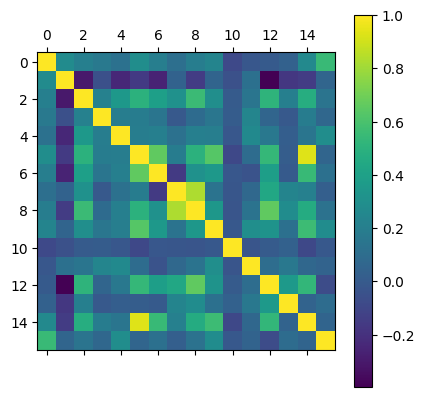

In [67]:
# 상관관계 시각화 matshow()
plt.matshow(corr)
plt.colorbar()
plt.show()

In [70]:
# (참고) 시각화 도구 plotly 활용
import plotly.express as px
f = px.imshow(corr, text_auto=True)
f.update_layout(title='상관관계 시각화', width=800, title_x=0.5)
f.show()

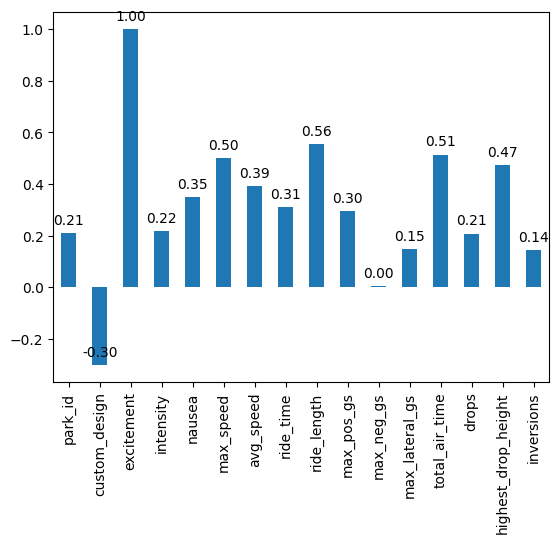

In [75]:
# 흥미('excitement')정보 시각화
corr2 = corr['excitement']
corr2.plot.bar()
  # plt.rcParams['axes.unicode_minus'] = False # 음수 값 오류 발생시 코드
for i in range(0, len(corr2)) :
  plt.text(i, corr2[i] + 0.05, '%.2f' %corr2[i], va='center', ha='center')
plt.show()

# [연습문제]
### 흥미('excitement')속성과 상관관계가 높은 속성부터 순서대로 출력해보자.
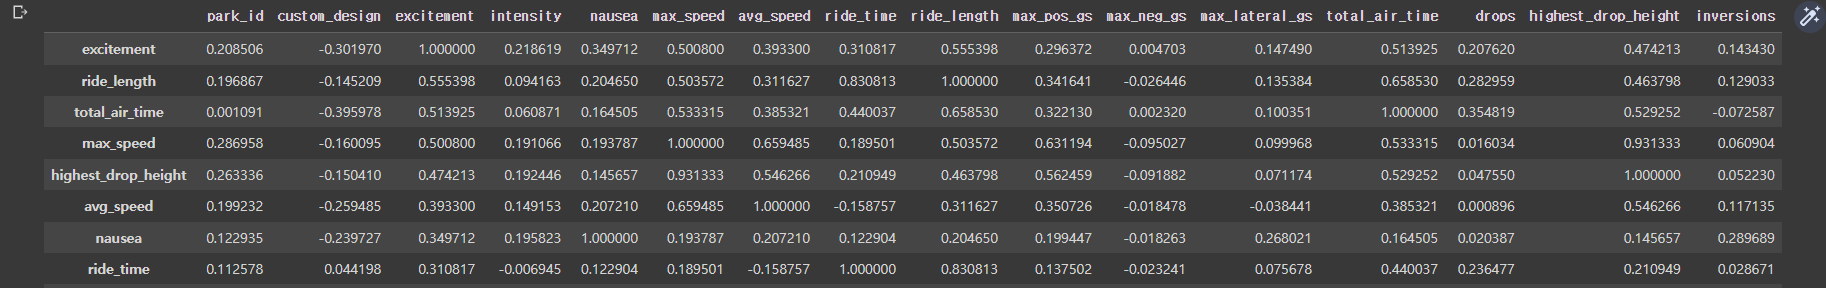

In [76]:
corr

,park_id,custom_design,excitement,intensity,nausea,max_speed,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
park_id,1.000000,0.275621,0.208506,0.170565,0.122935,0.286958,0.199232,0.112578,0.196867,0.235944,-0.086916,-0.019231,0.001091,0.038230,0.263336,0.550886
custom_design,0.275621,1.000000,-0.301970,-0.054868,-0.239727,-0.160095,-0.259485,0.044198,-0.145209,0.053533,-0.049630,0.117613,-0.395978,-0.171402,-0.150410,0.057233
excitement,0.208506,-0.301970,1.000000,0.218619,0.349712,0.500800,0.393300,0.310817,0.555398,0.296372,0.004703,0.147490,0.513925,0.207620,0.474213,0.143430
intensity,0.170565,-0.054868,0.218619,1.000000,0.195823,0.191066,0.149153,-0.006945,0.094163,0.150158,0.009947,0.236579,0.060871,-0.004128,0.192446,0.072356
nausea,0.122935,-0.239727,0.349712,0.195823,1.000000,0.193787,0.207210,0.122904,0.204650,0.199447,-0.018263,0.268021,0.164505,0.020387,0.145657,0.289689
max_speed,0.286958,-0.160095,0.500800,0.191066,0.193787,1.000000,0.659485,0.189501,0.503572,0.631194,-0.095027,0.099968,0.533315,0.016034,0.931333,0.060904
avg_speed,0.199232,-0.259485,0.393300,0.149153,0.207210,0.659485,1.000000,-0.158757,0.311627,0.350726,-0.018478,-0.038441,0.385321,0.000896,0.546266,0.117135
ride_time,0.112578,0.044198,0.310817,-0.006945,0.122904,0.189501,-0.158757,1.000000,0.830813,0.137502,-0.023241,0.075678,0.440037,0.236477,0.210949,0.028671
ride_length,0.196867,-0.145209,0.555398,0.094163,0.204650,0.503572,0.311627,0.830813,1.000000,0.341641,-0.026446,0.135384,0.658530,0.282959,0.463798,0.129033
max_pos_gs,0.235944,0.053533,0.296372,0.150158,0.199447,0.631194,0.350726,0.137502,0.341641,1.000000,-0.009395,0.291187,0.322130,0.121568,0.562459,0.283741
